# Add a new plugin

By default, the library will import all the files with prefix "plugin\_\*.py" from src/synthcity/plugins, and load all the classes which implement the [Plugin interface](src/synthcity/plugins/core/plugin.py).

Each plugin must implement the following methods:
- hyperparameter_space() - a static method that returns the hyperparameters that can be tuned during AutoML.
- type() - a static method that returns the type of the plugin. e.g., debug, generative, bayesian, etc.
- name() - a static method that returns the name of the plugin. e.g., ctgan, random_noisee, etc.
- _fit() - internal method, called by `fit` on each training set.
- _generate() - internal method, called by `generate`.

In [ ]:
#!pip install synthcity
#!pip uninstall -y torchaudio torchdata

## Existing plugins

In [11]:
# synthcity absolute
from synthcity.plugins import Plugins

generators = Plugins()

generators.list()

[2024-06-24T18:22:57.921187+0200][293585][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
[2024-06-24T18:22:57.921187+0200][293585][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py


['marginal_distributions',
 'arf',
 'tvae',
 'survival_nflow',
 'decaf',
 'timevae',
 'aim',
 'nflow',
 'great',
 'pategan',
 'image_cgan',
 'fflows',
 'timegan',
 'survival_gan',
 'rtvae',
 'image_adsgan',
 'bayesian_network',
 'survae',
 'radialgan',
 'dpgan',
 'ctgan',
 'survival_ctgan',
 'privbayes',
 'uniform_sampler',
 'adsgan',
 'ddpm',
 'dummy_sampler']

## Example plugin: Generate 0-1

In [ ]:
# stdlib
from typing import Any, List

# third party
import numpy as np
import pandas as pd

# synthcity absolute
from synthcity.plugins.core.dataloader import DataLoader, GenericDataLoader
from synthcity.plugins.core.distribution import Distribution
from synthcity.plugins.core.plugin import Plugin
from synthcity.plugins.core.schema import Schema


class ZeroOnePlugin(Plugin):
    """Dummy plugin for debugging."""

    def __init__(self, **kwargs: Any) -> None:
        super().__init__(**kwargs)

    @staticmethod
    def name() -> str:
        return "zero_one"

    @staticmethod
    def type() -> str:
        return "debug"

    @staticmethod
    def hyperparameter_space(*args: Any, **kwargs: Any) -> List[Distribution]:
        return []

    def _fit(self, X: DataLoader, *args: Any, **kwargs: Any) -> "ZeroOnePlugin":
        self.features_count = X.shape[1]
        return self

    def _generate(self, count: int, syn_schema: Schema, **kwargs: Any):
        return GenericDataLoader(
            np.random.randint(0, 2, size=(count, self.features_count))
        )

In [3]:
# Add the new plugin to the collection

generators.add("zero_one", ZeroOnePlugin)

In [4]:
# Check the new plugins list
generators.list()

['pategan',
 'timevae',
 'survival_nflow',
 'aim',
 'decaf',
 'privbayes',
 'survival_gan',
 'uniform_sampler',
 'ctgan',
 'tvae',
 'ddpm',
 'timegan',
 'image_cgan',
 'survae',
 'survival_ctgan',
 'dummy_sampler',
 'image_adsgan',
 'great',
 'dpgan',
 'marginal_distributions',
 'radialgan',
 'rtvae',
 'fflows',
 'adsgan',
 'zero_one',
 'nflow',
 'arf',
 'bayesian_network']

In [5]:
# Load reference data

# third party
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

loader = GenericDataLoader(X)

loader.dataframe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# Train the new plugin

gen = generators.get("zero_one")

gen.fit(loader)

In [7]:
# Generate some new data

gen.generate(count=10)

RuntimeError: Plugin zero_one failed to meet the synthetic constraints.

### Oops, this didn't work.

__The Plugin interface enforces the new generated data to:__
 - satistify the same constraints as the training set.
 - Or to satisfy the constraints provided at inference time(if provided).
 
 
 If the generated dataframe fails to comply, an exception will be raised.

Let's try again

## A functional plugin: Integrate SDV CTGAN

In this example, we will show how to integrate the CTGAN implementation from the [SDV library](https://github.com/sdv-dev/SDV).

__Note__ : `synthcity` also includes a dedicated CTGAN re-implementation.

In [8]:
!pip install ctgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.6 MB/s eta 0:00:0000:0100:01


In [ ]:
import torch
X_false_train = (np.random.rand(512, X.shape[1]) * 4 - 2) / 4.
X_random_test = np.random.rand(n_random_test_samples, X.shape[1]) * 4 - 2

for batch in tqdm(range(n_batches)):
    n_train = 512
    n_test = 2048
    tabpfn_output_proba_list = []
    for _ in range(3):
        indices_train = np.random.choice(X.shape[0], n_train, replace=False)
        X_batch_train = X[indices_train]
        indices_test = np.random.choice(X.shape[0], n_test, replace=False)
        X_batch_test = X[indices_test]
        indices_false_test = np.random.choice(X_random_test.shape[0], len(X_batch_test), replace=False)
        X_false_test = X_random_test[indices_false_test]

        indices_false_train = np.random.choice(X_false_train.shape[0], len(X_batch_train), replace=False)
        X_false_batch_train = X_false_train[indices_false_train]

        X_train = torch.cat((X_batch_train, X_false_batch_train), dim=0)
        X_test = torch.cat((X_batch_test, X_false_test), dim=0)
        y_train = torch.cat((torch.ones(X_batch_train.shape[0]), torch.zeros(X_false_batch_train.shape[0])), dim=0).long()
        y_test = torch.cat((torch.ones(X_batch_test.shape[0]), torch.zeros(X_false_test.shape[0])), dim=0).long()
        #y_test = torch.ones(X_batch_test.shape[0]).long()
        #y_test = torch.zeros(X_false_test.shape[0]).long()

        perm_train = torch.randperm(X_train.shape[0])
        X_train = X_train[perm_train]
        y_train = y_train[perm_train]
        perm_test = torch.randperm(X_test.shape[0])
        X_test = X_test[perm_test]
        y_test = y_test[perm_test]

        # add a third feature to X_train and X_test with random values
        X_train = torch.cat((X_train, torch.randn(X_train.shape[0], 1).to(device)), dim=1)
        X_test = torch.cat((X_test, torch.randn(X_test.shape[0], 1).to(device)), dim=1)
        tabpfn_classifier.fit(X_train, y_train, overwrite_warning=True)
        tabpfn_output_proba = tabpfn_classifier.predict_proba(X_test)
        tabpfn_output_proba_list.append(tabpfn_output_proba)
    tabpfn_output_proba = torch.stack(tabpfn_output_proba_list).mean(dim=0)

    loss = torch.mean(torch.abs((tabpfn_output_proba[:, 0] - tabpfn_output_proba[:, 1]))**2)
    loss_list.append(loss.item())
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()





In [3]:
# stdlib
from typing import Any, List

# third party
import numpy as np
import pandas as pd
from ctgan import CTGAN

# synthcity absolute
from synthcity.plugins.core.dataloader import DataLoader, GenericDataLoader
from synthcity.plugins.core.distribution import Distribution
from synthcity.plugins.core.plugin import Plugin
from synthcity.plugins.core.schema import Schema
from synthcity.plugins.core.distribution import (
    Distribution,
    IntegerDistribution,
)
from tabpfn import TabPFNClassifier
import torch
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler




class tabpfn_plugin(Plugin):
    """SDV CTGAN integration in synthcity."""

    def __init__(
        self,
        n_random_test_samples: int = 3_000,
        device: str = "cuda:0",
        n_batches: int = 200,
        lr: float = 0.1,
        n_permutations: int = 3,
        n_ensembles: int = 3,
        store_intermediate_data: bool = False,
        **kwargs: Any
    ) -> None:
        super().__init__(**kwargs)
        self.n_random_test_samples = n_random_test_samples
        self.device = device
        X_false_train = (np.random.rand(512, X.shape[1]) * 4 - 2) / 5.
        self.X_false_train = torch.tensor(X_false_train).float().to(device)
        self.X_false_train.requires_grad = True
        self.n_batches = n_batches
        self.lr = lr
        self.n_permutations = n_permutations
        self.n_ensembles = n_ensembles
        self.preprocessor = StandardScaler()
        self.store_intermediate_data = store_intermediate_data
        if store_intermediate_data:
            self.loss_list = []
            self.all_X_false_train = []


    @staticmethod
    def name() -> str:
        return "tabpfn_points"

    @staticmethod
    def type() -> str:
        return "debug"

    @staticmethod
    def hyperparameter_space(**kwargs: Any) -> List[Distribution]:
        """
        We can customize the hyperparameter space, and use it in AutoML benchmarks.
        """
        #TODO
        return [
            IntegerDistribution(name="embedding_n_units", low=100, high=500, step=50),
            IntegerDistribution(name="batch_size", low=100, high=300, step=50),
            IntegerDistribution(name="n_iter", low=100, high=500, step=50),
        ]

    def _fit(self, X: DataLoader, *args: Any, **kwargs: Any) -> "tabpfn_plugin":
        X_true = self.preprocessor.fit_transform(X.numpy()) # all numerical features for now
        X_true = torch.tensor(X_true, dtype=torch.float32).to(self.device)
        X_random_test = np.random.rand(self.n_random_test_samples, X.shape[1]) * 4 - 2
        X_random_test = torch.tensor(X_random_test).float().to(self.device)

        optimizer = torch.optim.Adam([self.X_false_train], lr=self.lr)

        tabpfn_classifier = TabPFNClassifier(device=self.device, N_ensemble_configurations=self.n_permutations,
                                              no_preprocess_mode=True, no_grad=False, normalize=False)

        for batch in tqdm(range(self.n_batches)):
            n_train = 512
            n_test = min(2048, X_true.shape[0])
            tabpfn_output_proba_list = []
            for _ in range(self.n_ensembles):
                indices_train = np.random.choice(X_true.shape[0], n_train, replace=False)
                X_batch_train = X_true[indices_train]
                indices_test = np.random.choice(X_true.shape[0], n_test, replace=False)
                X_batch_test = X_true[indices_test]
                indices_false_test = np.random.choice(X_random_test.shape[0], len(X_batch_test), replace=False)
                X_false_test = X_random_test[indices_false_test]

                indices_false_train = np.random.choice(self.X_false_train.shape[0], len(X_batch_train), replace=False)
                X_false_batch_train = self.X_false_train[indices_false_train]

                X_train = torch.cat((X_batch_train, X_false_batch_train), dim=0)
                X_test = torch.cat((X_batch_test, X_false_test), dim=0)
                y_train = torch.cat((torch.ones(X_batch_train.shape[0]), torch.zeros(X_false_batch_train.shape[0])), dim=0).long()
                y_test = torch.cat((torch.ones(X_batch_test.shape[0]), torch.zeros(X_false_test.shape[0])), dim=0).long()
                #y_test = torch.ones(X_batch_test.shape[0]).long()
                #y_test = torch.zeros(X_false_test.shape[0]).long()

                perm_train = torch.randperm(X_train.shape[0])
                X_train = X_train[perm_train]
                y_train = y_train[perm_train]
                perm_test = torch.randperm(X_test.shape[0])
                X_test = X_test[perm_test]
                y_test = y_test[perm_test]

                # add a third feature to X_train and X_test with random values
                X_train = torch.cat((X_train, torch.randn(X_train.shape[0], 1).to(self.device)), dim=1)
                X_test = torch.cat((X_test, torch.randn(X_test.shape[0], 1).to(self.device)), dim=1)
                tabpfn_classifier.fit(X_train, y_train, overwrite_warning=True)
                tabpfn_output_proba = tabpfn_classifier.predict_proba(X_test)
                tabpfn_output_proba_list.append(tabpfn_output_proba)
            tabpfn_output_proba = torch.stack(tabpfn_output_proba_list).mean(dim=0)

            loss = torch.mean(torch.abs((tabpfn_output_proba[:, 0] - tabpfn_output_proba[:, 1]))**2)
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()

            if self.store_intermediate_data:
                self.loss_list.append(loss.item())
                self.all_X_false_train.append(self.X_false_train.detach().cpu().numpy())

    def sample(self, count: int, **kwargs: Any) -> pd.DataFrame:
        if count > len(self.X_false_train):
            raise ValueError("Requested count exceeds the available data.")
        indices = np.random.choice(len(self.X_false_train), count, replace=False)
        false_points = self.X_false_train[indices].detach().cpu().numpy()
        return self.preprocessor.inverse_transform(false_points)
    
    def _generate(self, count: int, syn_schema: Schema, **kwargs: Any) -> pd.DataFrame:
        return self._safe_generate(self.sample, count, syn_schema)

In [4]:
# stdlib
from typing import Any, List

# third party
import numpy as np
import pandas as pd
from ctgan import CTGAN

# synthcity absolute
from synthcity.plugins.core.dataloader import DataLoader, GenericDataLoader
from synthcity.plugins.core.distribution import Distribution
from synthcity.plugins.core.plugin import Plugin
from synthcity.plugins.core.schema import Schema
from synthcity.plugins.core.distribution import (
    Distribution,
    IntegerDistribution,
)


class sdv_ctgan_plugin(Plugin):
    """SDV CTGAN integration in synthcity."""

    def __init__(
        self,
        embedding_n_units: int = 128,
        n_iter: int = 2000,
        batch_size: int = 100,
        cat_limit: int = 15,
        **kwargs: Any
    ) -> None:
        super().__init__(**kwargs)
        self.cat_limit = cat_limit
        self.model = CTGAN(
            embedding_dim=embedding_n_units,
            batch_size=batch_size,
            epochs=n_iter,
            verbose=False,
        )

    @staticmethod
    def name() -> str:
        return "sdv_ctgan"

    @staticmethod
    def type() -> str:
        return "debug"

    @staticmethod
    def hyperparameter_space(**kwargs: Any) -> List[Distribution]:
        """
        We can customize the hyperparameter space, and use it in AutoML benchmarks.
        """
        return [
            IntegerDistribution(name="embedding_n_units", low=100, high=500, step=50),
            IntegerDistribution(name="batch_size", low=100, high=300, step=50),
            IntegerDistribution(name="n_iter", low=100, high=500, step=50),
        ]

    def _fit(self, X: DataLoader, *args: Any, **kwargs: Any) -> "sdvPlugin":
        """We selected the discrete columns based on the count of unique values, and train the CTGAN"""
        discrete_columns = []

        for col in X.columns:
            if len(X[col].unique()) < self.cat_limit:
                discrete_columns.append(col)

        self.model.fit(X.dataframe(), discrete_columns=discrete_columns)
        return self

    def _generate(self, count: int, syn_schema: Schema, **kwargs: Any) -> pd.DataFrame:
        return self._safe_generate(self.model.sample, count, syn_schema)

In [15]:
generators.add("tabpfn_points", tabpfn_plugin)

generators.list()

['marginal_distributions',
 'arf',
 'tvae',
 'decaf',
 'aim',
 'nflow',
 'tabpfn_points',
 'great',
 'pategan',
 'rtvae',
 'bayesian_network',
 'radialgan',
 'dpgan',
 'ctgan',
 'privbayes',
 'uniform_sampler',
 'adsgan',
 'ddpm',
 'dummy_sampler']

In [75]:
generators.add("sdv_ctgan", sdv_ctgan_plugin)

generators.list()

['pategan',
 'timevae',
 'survival_nflow',
 'aim',
 'decaf',
 'privbayes',
 'survival_gan',
 'uniform_sampler',
 'ctgan',
 'tvae',
 'ddpm',
 'timegan',
 'image_cgan',
 'survae',
 'survival_ctgan',
 'dummy_sampler',
 'image_adsgan',
 'tabpfn_points',
 'great',
 'dpgan',
 'marginal_distributions',
 'radialgan',
 'rtvae',
 'fflows',
 'sdv_ctgan',
 'adsgan',
 'zero_one',
 'nflow',
 'arf',
 'bayesian_network']

In [76]:
len(loader)

569

In [78]:
# Train the new plugin

gen = generators.get("tabpfn_points")
gen.n_batches = 10

gen.strict = False

gen.fit(loader)

100%|██████████| 10/10 [00:05<00:00,  1.93it/s]


<Axes: >

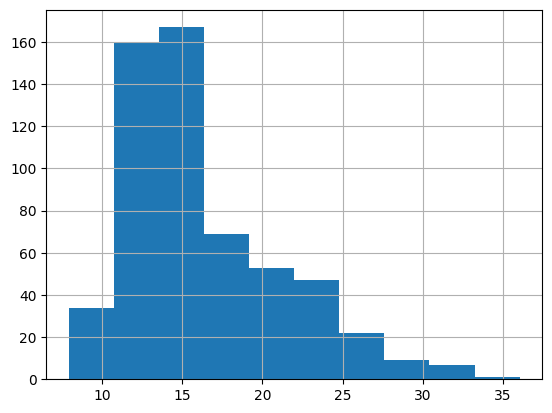

In [ ]:
loader["worst radius"].hist()

In [66]:
# Custom generation constraints

# synthcity absolute
from synthcity.plugins.core.constraints import Constraints

constraints = Constraints(rules=[("worst radius", ">", 15)])

generated = gen.generate(count=10, constraints=constraints)

assert (generated["worst radius"] > 15).any()

generated.dataframe()

KeyError: 'worst radius'

In [79]:
# Generate some new data

gen.generate(count=10).dataframe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.143452,0.706859,0.107508,0.520271,0.276886,-0.403491,-0.030989,-0.608223,-0.527667,0.265383,...,-0.832876,-0.081572,-0.398780,0.635463,0.707953,0.514811,0.208479,0.153695,-0.202452,0.461582
1,-0.403354,0.389661,-0.146273,0.185688,0.190252,-0.240338,0.461608,-0.036368,-0.009005,0.363217,...,-0.674194,-0.301270,0.220221,0.533802,0.368857,0.961607,-0.077836,-0.651909,0.118947,0.649172
2,-1.073270,-0.842144,-0.206902,-1.093323,-0.108109,0.154321,0.225621,-0.214230,0.200498,-0.867173,...,0.110798,0.148891,-0.630756,-0.669224,-0.860987,-0.108985,0.154308,0.207170,-0.298122,0.481516
3,0.146426,-0.024359,0.334682,0.243707,0.229419,0.400828,0.633097,0.401732,-0.439544,0.117514,...,-0.239918,-0.251738,-0.477767,-0.788297,0.171493,-0.277413,0.641131,0.593406,0.723870,0.831400
4,-0.362978,-0.797379,-0.334688,-0.514624,-0.568989,-0.124109,-1.047604,0.196651,0.061629,-0.822013,...,0.510174,0.573802,-0.376807,-0.275510,-0.424400,-0.374239,0.496334,-0.411851,0.079757,-0.157031
5,-0.588909,-0.463570,0.087747,-0.244062,-0.098555,0.281085,-0.273270,-0.104816,0.497653,-0.914663,...,-0.568087,-0.839490,0.122515,-0.421690,-0.660135,0.161395,-0.360972,0.719650,-0.424235,0.196506
6,-0.071212,0.033606,-0.370891,0.072736,-0.285238,-1.039858,-0.624847,-0.262603,-0.992106,-0.339837,...,-0.232381,0.234086,-0.102238,-0.575053,0.529563,0.967899,0.205428,-0.250460,0.543164,0.471720
7,-0.001309,0.231795,0.766179,0.285001,0.208191,-0.408865,0.058076,0.585879,-0.062286,-0.049796,...,-0.411789,0.711149,0.120944,0.562483,-0.281786,0.460095,0.582507,0.769418,0.626017,0.375084
8,0.163862,0.769153,0.311299,0.737519,0.297987,-0.536934,0.742917,-0.055573,-0.264304,-0.658050,...,-0.431519,0.490365,0.067128,0.230411,-0.388786,-0.560532,-0.201018,1.038547,0.187431,0.258178
9,0.046166,0.375633,0.135272,-0.171174,-0.438572,1.083165,0.535368,0.596301,0.674267,0.199958,...,-0.426089,-0.429730,0.307725,0.329526,0.692251,0.894805,-0.699113,0.071129,-0.102259,-0.245890


In [13]:
# Custom generation constraints

# synthcity absolute
from synthcity.plugins.core.constraints import Constraints

constraints = Constraints(rules=[("worst radius", ">", 15)])

generated = gen.generate(count=10, constraints=constraints)

assert (generated["worst radius"] > 15).any()

generated.dataframe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,18.768209,19.253177,110.225173,595.444183,0.116616,0.129017,0.028019,0.188623,0.151970,0.058581,...,17.602277,14.745324,73.018773,288.081164,0.119045,0.438891,0.831360,0.115876,0.297262,0.093979
1,17.912877,14.088288,64.041452,1210.338568,0.096006,0.100299,0.177656,0.002223,0.202004,0.053853,...,21.971838,13.820074,119.763739,1996.794155,0.175193,0.386955,0.338407,0.085585,0.366361,0.104713
2,9.955719,17.677910,144.795231,1391.246989,0.090126,0.068232,0.112443,0.007501,0.200516,0.052738,...,22.998582,13.227556,105.534711,214.814677,0.142662,0.271410,0.719043,0.048597,0.239514,0.058331
3,16.361051,15.007685,112.719466,790.019355,0.088310,0.118090,0.227707,0.016214,0.176855,0.055486,...,20.524020,18.082285,179.458407,370.263915,0.162694,0.181995,0.067748,0.061052,0.255036,0.099323
4,13.553901,19.963528,73.753659,896.801321,0.093400,0.045035,0.030909,0.056342,0.211581,0.051608,...,29.285827,19.996392,180.110308,417.107345,0.152008,0.450560,0.013071,0.006750,0.268199,0.062146
5,13.183985,20.187044,91.240150,1268.181215,0.077964,0.244513,0.085972,0.048331,0.168912,0.064259,...,16.290260,18.602535,123.865367,512.645632,0.177170,0.302889,0.313941,0.029717,0.267157,0.131442
6,11.796048,14.833078,100.123530,212.088064,0.071620,0.179865,0.055945,0.054721,0.205110,0.052928,...,24.168494,16.799961,131.834212,371.652674,0.148877,0.343283,0.269647,0.061103,0.461483,0.067135
7,17.950953,13.445698,95.182607,310.439760,0.076594,0.276589,0.099291,0.023155,0.215689,0.055939,...,21.919618,21.220080,73.263441,847.370430,0.148538,0.303190,0.032364,0.001126,0.254766,0.098433
8,16.092435,15.445917,104.322755,475.884238,0.069202,0.116076,0.024698,0.001568,0.216293,0.056056,...,24.863074,16.777359,106.084712,282.873420,0.125798,0.262764,0.260519,0.058074,0.492282,0.090056


## Congratulations!

Congratulations on completing this notebook tutorial! If you enjoyed this and would like to join the movement towards Machine learning and AI for medicine, you can do so in the following ways!

### Star [Synthcity](https://github.com/vanderschaarlab/synthcity) on GitHub

- The easiest way to help our community is just by starring the Repos! This helps raise awareness of the tools we're building.


### Checkout other projects from vanderschaarlab
- [HyperImpute](https://github.com/vanderschaarlab/hyperimpute)
- [AutoPrognosis](https://github.com/vanderschaarlab/autoprognosis)


In [6]:
from sklearn.datasets import load_diabetes, make_moons
from synthcity.plugins import Plugins
import pandas as pd
from synthcity.plugins.core.dataloader import GenericDataLoader

#X, y = load_diabetes(return_X_y=True, as_frame=True)
#X["target"] = y
X = make_moons(n_samples=1000, noise=0.1)[0]

# make into a pandas dataframe
X = pd.DataFrame(X, columns=["x1", "x2"])


loader = GenericDataLoader(X)

#model = generators.get("tabpfn_points")
model = tabpfn_plugin(n_batches=50, store_intermediate_data=True,
                      n_permutations=10, n_ensembles=5)

#model.fit(loader)

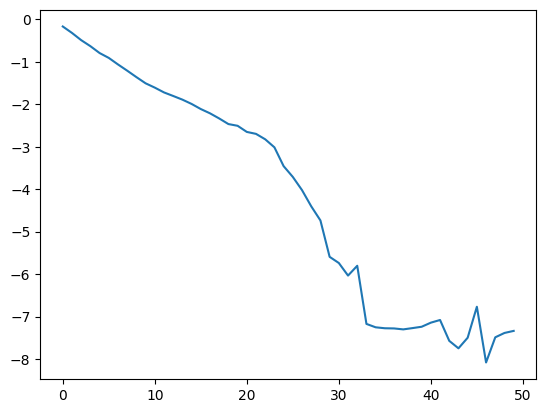

In [119]:
plt.plot(np.log(model.loss_list))

In [120]:
model.all_X_false_train[0].shape

(512, 2)

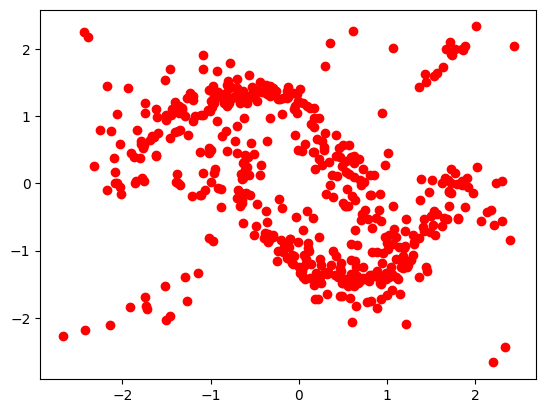

In [125]:
import matplotlib.pyplot as plt
false_points = model.sample(300)

plt.scatter(model.all_X_false_train[-1][:, 0], model.all_X_false_train[-1][:, 1], c="red", label="False points")

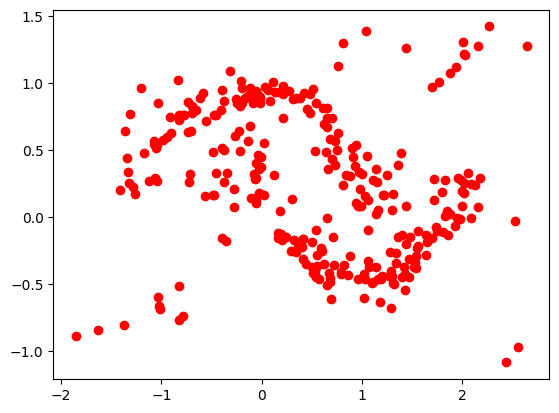

In [122]:
import matplotlib.pyplot as plt
false_points = model.sample(300)

plt.scatter(false_points[:, 0], false_points[:, 1], c="red", label="False points")

In [1]:
loader

NameError: name 'loader' is not defined

In [30]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [1]:
import openml
# import GenericDataLoader
from synthcity.plugins.core.dataloader import GenericDataLoader

dataset_id = 44090
dataset = openml.datasets.get_dataset(dataset_id)

X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

#X = X[["Latitude", "Longitude"]]

loader = GenericDataLoader(X)

In [39]:

# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [("tabpfn_points", "tabpfn_points", {"n_batches": 40})],
    loader,
    synthetic_size=512,
    repeats=1,
)



[2024-06-24T18:44:34.158569+0200][293585][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
100%|██████████| 40/40 [00:41<00:00,  1.04s/it]
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

In [19]:
# show all plugins
generators.list()

['radialgan',
 'nflow',
 'dpgan',
 'ctgan',
 'arf',
 'tvae',
 'rtvae',
 'decaf',
 'privbayes',
 'great',
 'adsgan',
 'pategan',
 'bayesian_network',
 'ddpm',
 'aim']

In [24]:

# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [("tabpfn_points", "tabpfn_points", {"n_batches": 40, "n_ensembles": 6, "n_permutations": 5})],
    loader,
    synthetic_size=512,
    repeats=1,
)



[2024-06-24T18:29:08.939580+0200][293585][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
100%|██████████| 40/40 [01:18<00:00,  1.97s/it]
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

In [40]:
Benchmarks.print(score)


Plugin : tabpfn_points


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch.score,0.111111,0.111111,0.111111,0.0,0.111111,0.0,1,0,0.00
sanity.common_rows_proportion.score,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1,0,0.00
sanity.nearest_syn_neighbor_distance.mean,0.014803,0.014803,0.014803,0.0,0.014803,0.0,1,0,0.00
sanity.close_values_probability.score,0.984375,0.984375,0.984375,0.0,0.984375,0.0,1,0,0.00
sanity.distant_values_probability.score,0.007812,0.007812,0.007812,0.0,0.007812,0.0,1,0,0.00
stats.jensenshannon_dist.marginal,0.011027,0.011027,0.011027,0.0,0.011027,0.0,1,0,0.05
stats.chi_squared_test.marginal,0.249995,0.249995,0.249995,0.0,0.249995,0.0,1,0,0.01
stats.inv_kl_divergence.marginal,0.797659,0.797659,0.797659,0.0,0.797659,0.0,1,0,0.01
stats.ks_test.marginal,0.881104,0.881104,0.881104,0.0,0.881104,0.0,1,0,0.01
stats.max_mean_discrepancy.joint,0.004393,0.004393,0.004393,0.0,0.004393,0.0,1,0,0.03


In [41]:
Benchmarks.highlight(score)


/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/benchmark/__init__.py:362: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  out.set_axis(results.keys(), axis=1, inplace=True)


,tabpfn_points
sanity.data_mismatch.score,0.111111
sanity.common_rows_proportion.score,0.000000
sanity.nearest_syn_neighbor_distance.mean,0.014803
sanity.close_values_probability.score,0.984375
sanity.distant_values_probability.score,0.007812
stats.jensenshannon_dist.marginal,0.011027
stats.chi_squared_test.marginal,0.249995
stats.inv_kl_divergence.marginal,0.797659
stats.ks_test.marginal,0.881104
stats.max_mean_discrepancy.joint,0.004393


In [42]:

# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [("ddpm", "ddpm", {})],
    loader,
    synthetic_size=512,
    repeats=1,
)



[2024-06-24T18:46:40.014593+0200][293585][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py


Epoch: 100%|██████████| 1000/1000 [02:48<00:00,  5.95it/s, loss=0.415]
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/scratch/lgrinszt/micromamba/env

In [9]:
score

{'forest_diffusion':                                                            min          max  \
 sanity.data_mismatch.score                            0.111111     0.111111   
 sanity.common_rows_proportion.score                   0.000000     0.000000   
 sanity.nearest_syn_neighbor_distance.mean             0.034426     0.034426   
 sanity.close_values_probability.score                 0.972656     0.972656   
 sanity.distant_values_probability.score               0.005859     0.005859   
 stats.jensenshannon_dist.marginal                     0.008596     0.008596   
 stats.chi_squared_test.marginal                       0.250000     0.250000   
 stats.inv_kl_divergence.marginal                      0.877242     0.877242   
 stats.ks_test.marginal                                0.865967     0.865967   
 stats.max_mean_discrepancy.joint                      0.003908     0.003908   
 stats.wasserstein_dist.joint                          0.011680     0.011680   
 stats.prdc.precisio

In [44]:
Benchmarks.highlight(score)

/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/benchmark/__init__.py:362: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  out.set_axis(results.keys(), axis=1, inplace=True)


,ddpm
sanity.data_mismatch.score,0.111111
sanity.common_rows_proportion.score,0.000000
sanity.nearest_syn_neighbor_distance.mean,0.012954
sanity.close_values_probability.score,0.992188
sanity.distant_values_probability.score,0.001953
stats.jensenshannon_dist.marginal,0.004182
stats.chi_squared_test.marginal,0.500000
stats.inv_kl_divergence.marginal,0.959455
stats.ks_test.marginal,0.937500
stats.max_mean_discrepancy.joint,0.003907


In [46]:

# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [("arf", "arf", {})],
    loader,
    synthetic_size=512,
    repeats=1,
)


Benchmarks.highlight(score)


[2024-06-24T18:52:13.055287+0200][293585][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.888532137880899
Iteration number 1 reached accuracy of 0.516084085539468.
Iteration number 2 reached accuracy of 0.48561216453625733.


/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

,arf
sanity.data_mismatch.score,0.111111
sanity.common_rows_proportion.score,0.000000
sanity.nearest_syn_neighbor_distance.mean,0.011533
sanity.close_values_probability.score,0.990234
sanity.distant_values_probability.score,0.001953
stats.jensenshannon_dist.marginal,0.005762
stats.chi_squared_test.marginal,0.375000
stats.inv_kl_divergence.marginal,0.925380
stats.ks_test.marginal,0.928955
stats.max_mean_discrepancy.joint,0.003907


In [47]:

# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [("ctgan", "ctgan", {})],
    loader,
    synthetic_size=512,
    repeats=1,
)


Benchmarks.highlight(score)


[2024-06-24T18:55:24.082088+0200][293585][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/

In [3]:
from synthcity_addons import generators

# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [("forest_diffusion", "forest_diffusion", {})],
    loader,
    synthetic_size=512,
    repeats=1,
)


Benchmarks.highlight(score)


[2024-06-25T00:10:38.462957+0200][321233][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py


,forest_diffusion
sanity.data_mismatch.score,0.111111
sanity.common_rows_proportion.score,0.000000
sanity.nearest_syn_neighbor_distance.mean,0.034426
sanity.close_values_probability.score,0.972656
sanity.distant_values_probability.score,0.005859
stats.jensenshannon_dist.marginal,0.008596
stats.chi_squared_test.marginal,0.250000
stats.inv_kl_divergence.marginal,0.877242
stats.ks_test.marginal,0.865967
stats.max_mean_discrepancy.joint,0.003908


In [1]:
from synthcity_addons import generators

# synthcity absolute
from synthcity.benchmark import Benchmarks

import openml
# import GenericDataLoader
from synthcity.plugins.core.dataloader import GenericDataLoader

dataset_id = 44090
dataset = openml.datasets.get_dataset(dataset_id)

X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

#X = X[["Latitude", "Longitude"]]

loader = GenericDataLoader(X)

#model = generators.get("forest_diffusion")

# model.fit(loader)

# model.generate(10)

score = Benchmarks.evaluate(
    [("forest_diffusion", "forest_diffusion", {})],
    loader,
    synthetic_size=512,
    repeats=1,
)


Benchmarks.highlight(score)


[2024-06-25T01:18:32.741748+0200][328768][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
INFO:datasets:PyTorch version 1.13.1 available.
INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmpz_0eckq_
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmpz_0eckq_/_remote_module_non_scriptable.py
INFO:openml.config:No config file found at /home/soda/lgrinszt/.config/openml/config, using default configuration.
INFO:openml.datasets.dataset:pickle write california


,forest_diffusion
sanity.data_mismatch.score,0.111111
sanity.common_rows_proportion.score,0.000000
sanity.nearest_syn_neighbor_distance.mean,0.034426
sanity.close_values_probability.score,0.972656
sanity.distant_values_probability.score,0.005859
stats.jensenshannon_dist.marginal,0.008596
stats.chi_squared_test.marginal,0.250000
stats.inv_kl_divergence.marginal,0.877242
stats.ks_test.marginal,0.865967
stats.max_mean_discrepancy.joint,0.003908


In [2]:
from synthcity_addons import generators

# synthcity absolute
from synthcity.benchmark import Benchmarks

import openml
# import GenericDataLoader
from synthcity.plugins.core.dataloader import GenericDataLoader

dataset_id = 44090
dataset = openml.datasets.get_dataset(dataset_id)

X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

#X = X[["Latitude", "Longitude"]]

loader = GenericDataLoader(X)

model = generators.get("smote")

model.fit(loader)

model.generate(10)

score = Benchmarks.evaluate(
    [("smote", "smote", {})],
    loader,
    synthetic_size=512,
    repeats=1,
    verbose=100
)


Benchmarks.highlight(score)


[2024-06-25T01:27:10.515994+0200][334157][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
INFO:datasets:PyTorch version 1.13.1 available.
INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmp5yt2ylhq
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmp5yt2ylhq/_remote_module_non_scriptable.py
INFO:openml.config:No config file found at /home/soda/lgrinszt/.config/openml/config, using default configuration.
INFO:openml.datasets.dataset:pickle write california
[2024-06-25T01:27:12.873557+0200][334157][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py


,smote
sanity.data_mismatch.score,0.111111
sanity.common_rows_proportion.score,0.000000
sanity.nearest_syn_neighbor_distance.mean,0.013557
sanity.close_values_probability.score,0.992188
sanity.distant_values_probability.score,0.001953
stats.jensenshannon_dist.marginal,0.004926
stats.chi_squared_test.marginal,0.250000
stats.inv_kl_divergence.marginal,0.902726
stats.ks_test.marginal,0.937500
stats.max_mean_discrepancy.joint,0.003951


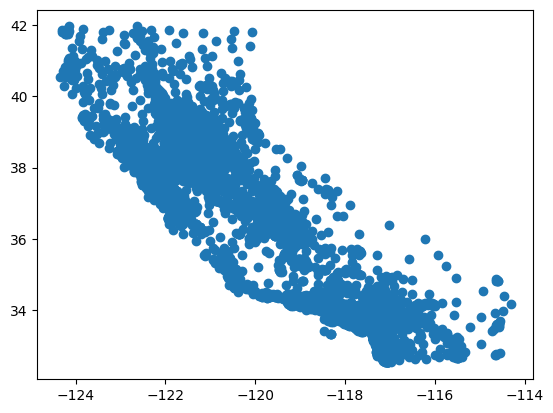

In [6]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

def generate_synthetic_samples(X, num_synthetic_samples, k_neighbors=5):
    """
    Generate synthetic samples by interpolating between nearest neighbors.

    Parameters:
    - X: Feature matrix (numpy array of shape [n_samples, n_features])
    - num_synthetic_samples: Number of synthetic samples to generate
    - k_neighbors: Number of nearest neighbors to use for interpolation

    Returns:
    - synthetic_samples: Array of synthetic samples
    """
    # Fit the NearestNeighbors model
    nn = NearestNeighbors(n_neighbors=k_neighbors)
    nn.fit(X)
    
    synthetic_samples = []
    for _ in range(num_synthetic_samples):
        # Randomly choose a sample from X
        idx = np.random.randint(len(X))
        sample = X[idx]
        
        # Find the k nearest neighbors
        neighbors = nn.kneighbors([sample], return_distance=False)
        
        # Randomly choose one of the neighbors
        neighbor_idx = np.random.choice(neighbors[0])
        neighbor = X[neighbor_idx]
        
        # Generate a synthetic sample by interpolation
        lam = np.random.uniform(0, 1)
        synthetic_sample = sample + lam * (neighbor - sample)
        
        synthetic_samples.append(synthetic_sample)
    
    return np.array(synthetic_samples)

# Example usage
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

num_synthetic_samples = 500
synthetic_samples = generate_synthetic_samples(loader.numpy(), num_synthetic_samples)

plt.scatter(loader.numpy()[:, -1], loader.numpy()[:, -2], label="Original data")
